c:\Users\santhosh\OneDrive\Desktop\AI_Sales_Analytics_Dashboard\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
13:39:51 - cmdstanpy - INFO - Chain [1] start processing
13:39:51 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\santhosh\OneDrive\Desktop\AI_Sales_Analytics_Dashboard\venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


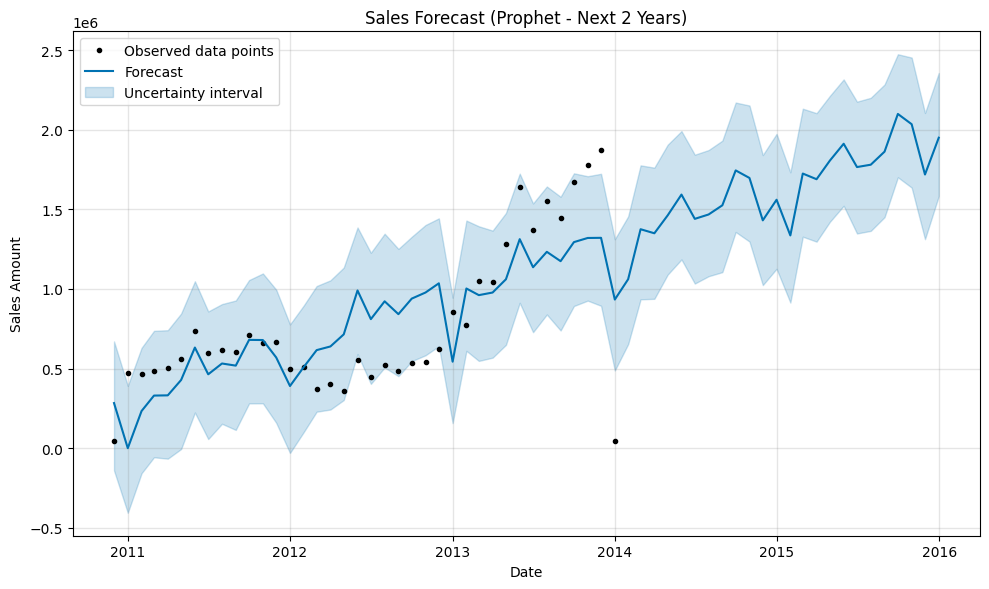

Forecast exported to visualizations/prophet_sales_forecast.csv


In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


# Load cleaned sales data
df = pd.read_csv("../data/cleaned_sales_data.csv")

# Convert OrderDate and aggregate monthly sales
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
monthly_sales = df.groupby(df['OrderDate'].dt.to_period('M')).agg({'SalesAmount': 'sum'}).reset_index()
monthly_sales['OrderDate'] = monthly_sales['OrderDate'].astype(str)

# Prepare for Prophet
prophet_df = monthly_sales.rename(columns={'OrderDate': 'ds', 'SalesAmount': 'y'})
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])

# Train Prophet model
model = Prophet()
model.fit(prophet_df)

# Forecast next 24 months
future = model.make_future_dataframe(periods=24, freq='M')
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.title("Sales Forecast (Prophet - Next 2 Years)")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Export to CSV
forecast[['ds', 'yhat']].to_csv("../visualization/prophet_sales_forecast.csv", index=False)
print("Forecast exported to visualizations/prophet_sales_forecast.csv")


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Merge forecasted and actual values
results = pd.merge(forecast[['ds', 'yhat']], df_prophet, on='ds', how='left')

# Drop rows with missing actuals
results = results.dropna()

# Actual vs Predicted
y_true = results['y']
y_pred = results['yhat']

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

# Print results
print("📊 Prophet Model Accuracy:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")


20:18:47 - cmdstanpy - INFO - Chain [1] start processing
20:18:47 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\santhosh\OneDrive\Desktop\AI_Sales_Analytics_Dashboard\venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


📊 Prophet Model Accuracy:
MAE  : 265104.07
RMSE : 318306.28
R²   : 0.5332


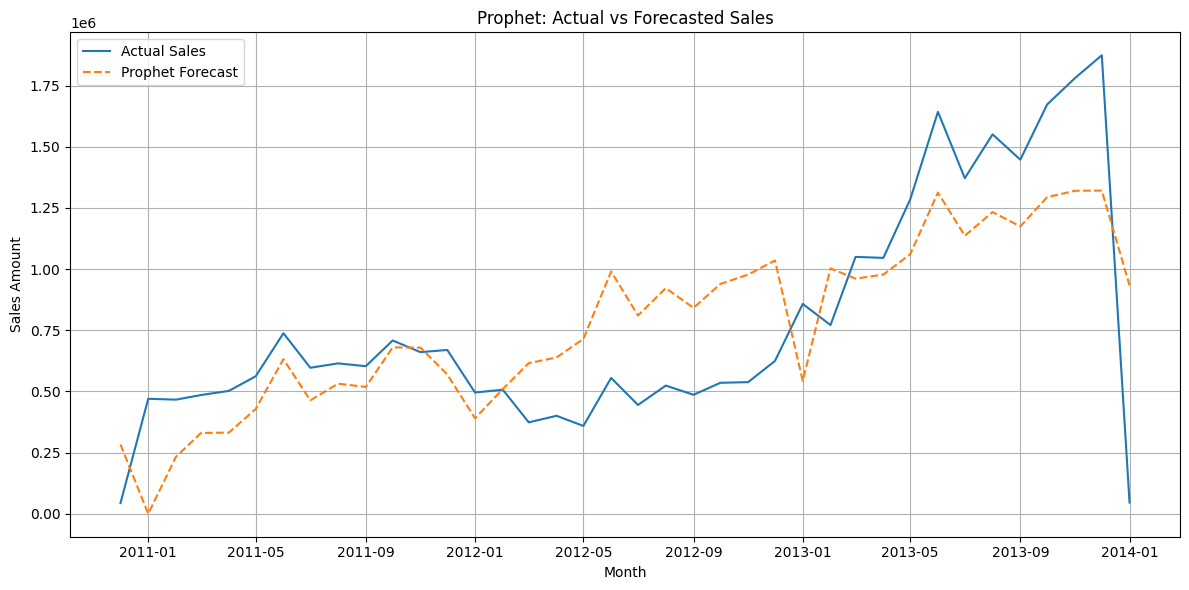

In [7]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# STEP 1: Load the dataset
df = pd.read_csv("../data/cleaned_sales_data.csv")

# STEP 2: Convert OrderDate and create 'Month'
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['Month'] = df['OrderDate'].dt.to_period('M').astype(str)

# STEP 3: Prepare the data for Prophet
monthly_sales = df.groupby('Month').agg({'SalesAmount': 'sum'}).reset_index()
monthly_sales.rename(columns={'Month': 'ds', 'SalesAmount': 'y'}, inplace=True)
monthly_sales['ds'] = pd.to_datetime(monthly_sales['ds'])

# STEP 4: Fit Prophet
model = Prophet()
model.fit(monthly_sales)

# STEP 5: Forecast next 24 months
future = model.make_future_dataframe(periods=24, freq='M')
forecast = model.predict(future)

# STEP 6: Merge with actuals
results = pd.merge(forecast[['ds', 'yhat']], monthly_sales, on='ds', how='left')
results = results.dropna()

# STEP 7: Accuracy metrics
y_true = results['y']
y_pred = results['yhat']

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print("📊 Prophet Model Accuracy:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")

# STEP 8: Plot
plt.figure(figsize=(12, 6))
plt.plot(results['ds'], results['y'], label='Actual Sales')
plt.plot(results['ds'], results['yhat'], label='Prophet Forecast', linestyle='--')
plt.title("Prophet: Actual vs Forecasted Sales")
plt.xlabel("Month")
plt.ylabel("Sales Amount")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
